 <h1 align = center> Principles of Object Oriented Programming </h1>

#### 4 principles
- Encapsulation
- Inheritance
- Polymorphism
- Abstraction


## ENCAPSULATION

In encapsulation, the variables of a class can be made hidden from other classes, and can be accessed only through the methods of their current class. Therefore, it is also known as data hiding.
<br><br>
Encapsulation can be described as a protective barrier that prevents the code and data being randomly accessed by other code defined outside the class. Access to the data and code is tightly controlled by a class.

In [24]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'


In [25]:
# dont do it this way anymore
# class Car():
#     def __init__(self, make, model):
#         self.make = make
#         self.model = model
        
#     def __repr__(self):
#         return F"this is a {self.make} {self.model}"
        
# honda = Car("Honda", "Civic")

# print(honda.make)
# print(honda)

# honda.make = "chevy"

# class Truck():
#     def __init__(self, make, model):
#         self.make = make
#         self.model = model




In [26]:
class Test_Video():
    def __init__(self):
        self.title = None
                
    def add_title(self):
        new_title = input("What are you watching? ")
        self.title = new_title
                
                                 
        
    def __repr__(self):
        return "HELLO"
        
my_video = Test_Video()
print(my_video.title)

my_video.add_title()
print(my_video.title.title())

# DONT DO THIS
# my_video.title = "Ted Lasso"
print(my_video)
# DIBT DI THIS
#my_vido.title = "ted lasso"
print(my_video)




None


What are you watching?  n


N
HELLO
HELLO


In [27]:
#video class
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

class Video():
    
    generic_image = 'codeflix.png'
    def __init__(self):
        self.title = None
        self.length = timedelta()
        self.link = generic_image
        
    def play(self):
        print(f"Now playing: {self.title}")
        display(Image(url = self.link))
        
    def __len__(self):
        return self.length
        
    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long"


## INHERITANCE

Inheritance can be defined as the process where one class acquires the properties (methods and fields) of another.
<br>
<i>(see above)</i>

In [28]:
# Episode inherits from Video class

class Episode(Video):
    def __init__(self, data):
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.title = data['name']
        self.length = timedelta(minutes = data['runtime'])
        if data['image']:
            self.link = data['image']['medium']
            

## POLYMORPHISM

In object-oriented programming, polymorphism (from the Greek meaning “having multiple forms”) is the characteristic of being able to assign a different meaning or usage to something in different contexts — specifically, to allow an entity such as a function, or an object to have more than one form.
<br><br>


In [29]:
class Series():
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.title = None
        self.genres = []
        self.episodes = []
        
    def get_info(self, query=''):
        data = None #the show we're looking for doesnt exist
        while not data:
            if not query:
                query = input("What is the name of the series? ")
                
            r = requests.get(f"https://api.tvmaze.com/singlesearch/shows?q={query}")
            if r.status_code == 200:
                data = r.json()
            else:
                print(f"Series Error: {r.status_code}")
                
#         Data to alter class attributes
        self.id = data['id']
        self.title = data['name']
        self.genres = data['genres']
        if data['network']:
            self.network = data['network']['name']
        else:
            self.network = data['webChannel']['name']
            
            
#         api call for episodes using the id from the series which is self.id
        r = requests.get(f"https://api.tvmaze.com/shows/{self.id}/episodes")
        if r.status_code == 200:
            episodes = r.json() # list of episode dictionaries that comes back from https://api.tvmaze.com/shows/216/episodes
            self.seasons = episodes[-1]['season']
            self.episodes = [Episode(ep) for ep in episodes] #each episode dictionary becomes the data we're passing into an Episode instance
            print(f"{self.title} has {len(self.episodes)} episodes")
        else:
            print(f"Print Episode Error: status_code {r.status_code}")
            
    
    
    def watch(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input("Are you still watching? also get a job y/n")
                if watching.lower().strip() not in ("yes", "y", "yeah", "ye", "affirmative", "si", "indeed"):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)
            
    def __len__(self):
        return len(self.episodes)
    
    def __repr__(self):
        return f"Title: {self.title}"     



In [30]:
my_show = Series()

In [31]:
my_show.get_info("Scrubs")

Scrubs has 182 episodes


In [32]:
my_show.watch()

Now playing: My First Day


Now playing: My Mentor


Now playing: My Best Friend's Mistake


Are you still watching? also get a job y/n n


In [35]:
class User:
    __id_counter = 1 #class attribute
    def __init__(self, username, password):
        self.username = username
        self.password = password[::-2]
        self.id = User.__id_counter
        User.__id_counter += 1
        self.watch_list = []
        
    def __str__(self):
        formatted_user = f"""
        {self.id} - {self.username.title()}
        pw: {self.password}
        """
        
        return formatted_user
    
    def __repr__(self):
        return f"<User {self.id} | {self.username}>"
    
    def check_password(self, password_guess):
        return self.password == password_guess[::-2]

## ABSTRACTION

Abstraction is a process of hiding the implementation details from the user, only the functionality will be provided to the user. We have a bit to do before this becomes visible. But you've seen it before with presenting the user with the option to enter inputs. We then take those input and do something with them.
<br><br>

In [38]:

from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

class Theater():
    def __init__(self):
        self.users = set()
        self.current_user = None
        
    # adding a user to self.users
    def add_user(self):
        username = input("Please enter a username: ")
        
        if username in {u.username for u in self.users}:
            print('User with that name already exists. Please try again!')
        else:
            password = input("Please enter your password: ")
            user = User(username, password)
            self.users.add(user)
            print(f"{user} has been created!!!")
            
        self.login_user()
        
#     login user 
    def login_user(self):
        username = input("What is your username? ")
        password = input("What is your password? ")
        
        for user in self.users:
            if user.username == username and user.check_password(password):
                self.current_user = user
                print(f"{user} has logged in!")
                break
        else:
            print("Username and/or password is incorrect!")
            
#     logout user
    def logout(self):
        self.current_user = None
        print("You have succesfully been logged out!")
        
#     update user
    def update_user(self):
        if self.current_user:
            print(self.current_user)
            new_user = input("Please enter the updated username or enter skip to keep your current username ")
            if new_user.lower() != "skip":
                self.current_user.username = new_user
            new_pw = input("Please enter the updated password or enter skip to keep current password")
            if new_pw != "skip":
                self.current_user.password = new_pw
            print(f"{self.current_user.username}'s info has been updated!")
        else:
            print("Please login to update your information")
            self.login_user()
            
# ---------------------------------------------------------------------------------------------------------------
# watchlist section

# add to watch list
    def add_to_watchlist(self, query=""):
        if self.current_user:
            show = Series()
            show.get_info(query)
            self.current_user.watch_list.append(show)
            
            print(f"{show.title} has been added to the watchlist!")
        
        else: 
            print("please sign in to add to your watchlist")
            self.login_user()
            
    # view watchlist
    def view_watch_list(self):
        if self.current_user:
            for series in self.current_user.watch_list:
                print(f"\n\n{series} | Episodes: {(len(series))}")
                print(f"\nSummary: \n {series.summary}")
                display(Image(series.episodes[0].link))
        else:
            print("please sign in to add to your watchlist")
            self.login_user()
            
#     remove from watchlist
    def delete(self):
        if self.current_user:
            print("Your current watchlist: ")
            self.view_watch_list()
            
            response = input("What would you like to remove from your watch list? ")
            
            for series in self.current_user.watch_list:
                if series.title.title() == response.title():
                    self.current_user.watch_list.remove(series)
                    print(f"{response.title()} has been removed from your watch list!")
                    break
            else:
                print("That title is not in your watch list! You GOON!") # 404 error
                
            self.view_watch_list()
            
        else:
            print("please sign in to add to your watchlist")
            self.login_user()
        
            
            
    def choose_from_watch_list(self):
        if self.current_user:
            self.view_watch_list()
            
            watch = input("What would you like to watch? ")
            for series in self.current_user.watch_list:
                if series.title.lower() == watch.lower().strip():
                    series.watch()
                    break
            else:
                response = input(f"{watch} is not in your watch list... would you like to add it? y/n")
                if response in ("yes", 'y'):
                    self.add_to_watchlist(watch)
                    
                    print("..........")
                    sleep(2)
                    print("...............")
                    self.current_user.watch_list[-1].watch()
                    
        else:
            print("please sign in to add to your watchlist")
            self.login_user()
            
            
    
#     runnnnn itttttt
    def run(self):
        """
        Method allowing users to choose a series and play episodes
        """
        display(Image(url=generic_image))
        
        if self.users:
            self.login_user()
        else:
            self.add_user()
            
            print("""
            What would you like to do?
            Add - add a new user
            Login - login to your profile
            Update - update user information
            Logout - Logout of your profile
            Search - search for shows
            Watch - pick something from your watchlist
            View - view your watchlist
            Delete - delete from watch list
            Quit - close the application            
            
            """)
            
        while True:
            response = input("What would you like to do? (add, update, login, search, watch, view, delete, quit?) ").lower()
            
            if response == "search":
                self.add_to_watchlist()
            elif response == "watch":
                self.choose_from_watch_list()
            elif response == "add":
                self.add_user()
            elif response == "logout":
                self.logout()
                new_response = input("What would you like to do next? login, add, quit").lower()
                if new_response == "add":
                    self.add_user()
                elif new_response == "login":
                    self.login_user()
                elif new_response == "quit":
                    print("Thanks for watching!")
                    break
                    
                else:
                    print("Please enter a valid response and try again!")
                    
            elif response == "login":
                self.login_user()
                
            elif response == "update":
                self.update_user()
                
            elif response == "view":
                self.view_watch_list()
                
            elif response == "delete":
                self.delete()
                
            elif response == "quit":
                print(f"Thanks for watching {self.current_user.username}! Now go outside and touch some grass!")
                break
            else:
                print("Please enter a valid input and try again!")
   









In [39]:
codeflix = Theater()

Please enter a username:  Bikram
Please enter your password:  1234



        1 - Bikram
        pw: 42
         has been created!!!


What is your username?  Bikram
What is your password?  1234



        1 - Bikram
        pw: 42
         has logged in!

            What would you like to do?
            Add - add a new user
            Login - login to your profile
            Update - update user information
            Logout - Logout of your profile
            Search - search for shows
            Watch - pick something from your watchlist
            View - view your watchlist
            Delete - delete from watch list
            Quit - close the application            
            
            


What would you like to do? (add, update, login, search, watch, view, delete, quit?)  watch
What would you like to watch?  nepali
nepali is not in your watch list... would you like to add it? y/n y


Aftershock: Everest and the Nepal Earthquake has 3 episodes
Aftershock: Everest and the Nepal Earthquake has been added to the watchlist!
..........
...............
Now playing: Wrong Place Wrong Time


Now playing: No Way Out


Now playing: Escape


What would you like to do? (add, update, login, search, watch, view, delete, quit?)  watch




Title: Aftershock: Everest and the Nepal Earthquake | Episodes: 3

Summary: 
 None


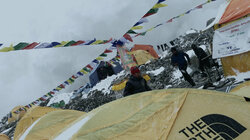

What would you like to watch?  quit
quit is not in your watch list... would you like to add it? y/n y


I Quit has 8 episodes
I Quit has been added to the watchlist!
..........
...............
Now playing: Taking the Leap


Now playing: Going All In


Now playing: Easier Said Than Done


Are you still watching? also get a job y/n n
What would you like to do? (add, update, login, search, watch, view, delete, quit?)  quit


Thanks for watching Bikram! Now go outside and touch some grass!


In [40]:
codeflix.run()

## Exercise 1

<p>Describe in your own words the following concepts and give an analogy tying to a real-world concept.

#### Difference between a Class and an Object

In [ ]:
"""
Class:
    A Class is a blueprint or template for creating objects. 
    It defines the properties and behaviours 
    that objects of that class will have. 
    A class can be thought of as a type, with objects being instances of that type.
    Logical entity.
    Does not allocate memory when declared.
    Can only be declared once.
    eg-Car

Object: 
    An object is an instance of a class. 
    It has a state, which is defined by the values of its properies, and a behavior,
    which is defined by the methods that it can execute. 
    Objects can interact with each other by sending messages to each other.
    Physical entity.
    Allocates memory when created.
    Can be created multiple times
    eg- Toyota camery, Honda accord

An analogy tying to a real-world concept:
    class       object
    Car ----->  Honda accord
    Person--->  Bikram
"""

#### Encapsulation

In [ ]:
"""
Encapsulation:
    Encapsulation is one of the four pillars of object-oriented programming(OOP).
    he variables of a class can be made hidden from other classes, and can be accessed 
    only through the methods of their current class. Therefore, it is also known as data hiding.

    Encapsulation is often implemented using modifiers, as public, private, and protected.
    Public members of a class can be accessed directly from outside the class, while private members 
    can only be access from within the class.
    Encapsulation can be described as a protective barrier that prevents the code and 
    data being randomly accessed by other code defined outside the class. 
    Access to the data and code is tightly controlled by a class.

Analogy: 
    Encapsulation is like a capsule that contains medicine. The xapsule protects the medicine from 
    being exposed to the air and other contaminants.It also makes it easier to swallow the medicine.

Real-World instance:

    class Car:
        def __init__(self, make, model, color):
        self.make = make
        self.model = model
        self.color = color
"""

#### Inheritance

In [ ]:
"""
Inheritance:
    Inheritance is a mechanism that allows a class to inherit the properties
    and behaviors of another class.
    This means tha the child class can reuse the code of the parent class, without having 
    to rewrite it frim scratch.

    Inheritance is a powerful feature that can be used to create hierarchies of the class,
    where each child class adds new features or specializes the behaviors of the parent class.
    This can be help to make code more reusable, modular, and maintainable.
    
    In short, Inheritance can be defined as the process 
    where one class acquires the properties (methods and fields) of another.

Analogy:
    Imagine that you are designing a software to built car. You might create a base class called
    Car.To define the properties and behaviors that all Cars share, name, type, model, and make.

    Real world instances: https://pokeapi.co

    # Episode inherits from Video class
"""

class Episode(Video):
    def __init__(self, data):
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.title = data['name']
        self.length = timedelta(minutes = data['runtime'])
        if data['image']:
            self.link = data['image']['medium']
            
    


#### Polymorphism

In [8]:
"""
Polymorphism:
    In object-oriented programming, polymorphism 
    (from the Greek meaning “having multiple forms”) is 
    the characteristic of being able to assign a different 
    meaning or usage to something in different 
    contexts — specifically, to allow an entity 
    such as a function, or an object to have more than one form.

Analogy
    Imagine that you are running a restaurant. You have a class called Employee that defines 
    the properties and behaviors of all employees in the restaurant. This class has properties 
    such as name, job title, and salary. It also has behaviors such as clockIn(), clockOut(), and paycheck().

Real world instance:
"""
class Car:
    def __init__(self, make, model, year):
        self.make = make
        self.model = model
        self.year = year
        self.engine = Engine()
        self.transmission = Transmission()
        self.brakes = Brakes()

    def drive(self):
        self.engine.start()
        self.transmission.shift_drive()
        self.brakes.release()

    def stop(self):
        self.brakes.apply()
        self.engine.stop()

class Engine:
    def start(self):
        # This method hides the internal details of how the engine is started.
        pass

    def stop(self):
        # This method hides the internal details of how the engine is stopped.
        pass

class Transmission:
    def shift_drive(self):
        # This method hides the internal details of how the transmission is shifted into drive.
        pass

class Brakes:
    def apply(self):
        # This method hides the internal details of how the brakes are applied.
        pass





#### Abstraction

In [ ]:
"""
Abstraction: 
    Abstraction is the process of hiding the internal details of an object and exposing only 
    the essential features. This allows users to interact with the object without having to 
    know how it works internally.


Analogy:

Abstraction is like a car. When you drive a car, you don't need to know how the 
engine works or how the brakes work. You just need to know how to use the steering wheel, 
the pedals, and the gearshift.

In the same way, when you use an object in an object-oriented program, 
you don't need to know how the object works internally. You just need 
to know how to use the object's methods.

Real World Instance :
"""

class Car:
    def __init__(self, make, model, year):
        self.make = make
        self.model = model
        self.year = year

    def drive(self):
        # This method hides the internal details of how the car is driven.
        pass

    def stop(self):
        # This method hides the internal details of how the car is stopped.
        pass


##  Exercise 2 (Optional):
Discuss what other classes, methods, or fields (attributes) we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads. Make sure you either write out your thoughts in the below cell  or comment where you added code to the above Classes.